In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ser1=pd.Series(data=[320,180,300,450],index=['一季度','二季度','三季度','四季度'])
ser1

一季度     32
二季度    180
三季度    300
四季度    450
dtype: int64

In [5]:
ser2=pd.Series({'一季度':320,'二季度':180,'三季度':300,'四季度':480})
ser2

一季度    320
二季度    180
三季度    300
四季度    480
dtype: int64

In [6]:
print(ser2[0],ser2[1],ser2[2],ser2[3])
ser2[0],ser2[3]=350,360
print(ser2)

320 180 300 480
一季度    350
二季度    180
三季度    300
四季度    360
dtype: int64


In [7]:
ser3 = pd.Series(data=['apple', 'banana', 'apple', 'pitaya', 'apple', 'pitaya', 'durian'])
ser3.value_counts()

apple     3
pitaya    2
banana    1
durian    1
Name: count, dtype: int64

In [8]:
ser5 = pd.Series(range(5))
# where ：条件不符合，替换
ser5.where(ser5 > 0)
ser5.where(ser5 > 1, 10)
# mask：条件符合，替换
ser5.mask(ser5 > 1, 10)

0     0
1     1
2    10
3    10
4    10
dtype: int64

In [11]:
ser6 = pd.Series(['cat', 'dog', np.nan, 'rabbit'])
ser6

0       cat
1       dog
2       NaN
3    rabbit
dtype: object

In [12]:
ser6.map({'cat':'kitten','dog':'puppy'})

0    kitten
1     puppy
2       NaN
3       NaN
dtype: object

In [15]:
ser6.map('I am a {}'.format,na_action='ignore')

0       I am a cat
1       I am a dog
2              NaN
3    I am a rabbit
dtype: object

In [16]:
ser7 = pd.Series([20, 21, 12],  index=['London', 'New York', 'Helsinki'])
ser7

London      20
New York    21
Helsinki    12
dtype: int64

In [18]:
ser7.apply(np.sqrt)

London      4.472136
New York    4.582576
Helsinki    3.464102
dtype: float64

In [21]:
ser7.apply(lambda x,value: x-value,args=(5,))

London      15
New York    16
Helsinki     7
dtype: int64

In [22]:
ser8 = pd.Series(
    data=[35, 96, 12, 57, 25, 89], 
index=['grape', 'banana', 'pitaya', 'apple', 'peach', 'orange']
)
# 按值从小到大排序
ser8.sort_values()

pitaya    12
peach     25
grape     35
apple     57
orange    89
banana    96
dtype: int64

In [23]:
plt.rcParams['font.sans-serif']=['SimHei',]
plt.rcParams['axes.unicode_minus']=False

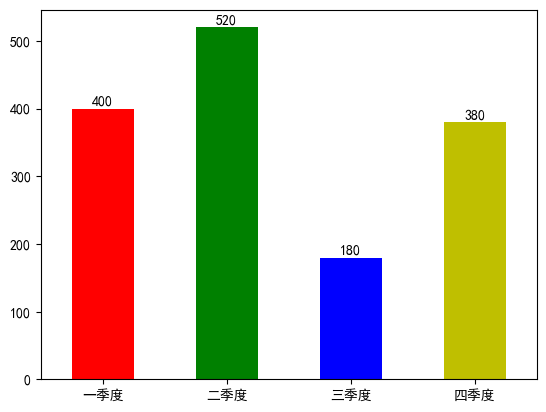

In [24]:
ser9 = pd.Series({'一季度': 400, '二季度': 520, '三季度': 180, '四季度': 380})
ser9.plot(kind='bar',color=['r','g','b','y'])
plt.xticks(rotation=0)
for i in range(4):
  plt.text(i,ser9[i]+5,ser9[i],ha='center')
plt.show()

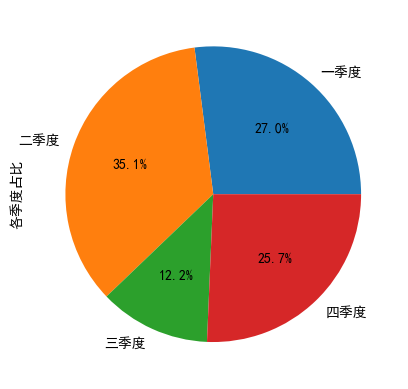

In [27]:
# autopct参数可以配置在饼图上显示每块饼的占比
ser9.plot(kind='pie', autopct='%.1f%%')
# 设置y轴的标签（显示在饼图左侧的文字）
plt.ylabel('各季度占比')
plt.show()

In [28]:
scores=np.random.randint(60,101,(5,3))
courses=['语文','数学','英语']
ids=[1001,1002,1003,1004,1005]
df1=pd.DataFrame(data=scores,columns=courses,index=ids)
df1

,语文,数学,英语
1001,97,79,67
1002,75,65,98
1003,96,70,90
1004,65,61,88
1005,97,81,75


In [30]:
scores={
  '语文':[62,72,93,88,93],
  '数学':[95,65,86,66,87],
  '英语':[66,75,82,69,82]
}
ids=[1001,1002,1003,1004,1005]
df2=pd.DataFrame(data=scores,index=ids)
df2

,语文,数学,英语
1001,62,95,66
1002,72,65,75
1003,93,86,82
1004,88,66,69
1005,93,87,82


In [35]:
import pymysql
conn=pymysql.connect(
  host='127.0.0.1',port=3306,
  user='guest',password='Guest.618',
  database='hrs',charset='utf8mb4'
)
dept_df=pd.read_sql('select * from tb_dept',conn,index_col='dno')
emp_df=pd.read_sql('select * from tb_emp',conn,index_col='eno')
emp2_df=pd.read_sql('select * from tb_emp2',conn,index_col='eno')

C:\Users\User\AppData\Local\Temp\ipykernel_13700\3672667975.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dept_df=pd.read_sql('select * from tb_dept',conn,index_col='dno')
C:\Users\User\AppData\Local\Temp\ipykernel_13700\3672667975.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_df=pd.read_sql('select * from tb_emp',conn,index_col='eno')
C:\Users\User\AppData\Local\Temp\ipykernel_13700\3672667975.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp2_df=pd.read_sql('select * from tb_emp2',conn,index_col='eno

,ename,job,mgr,sal,comm,dno
eno,,,,,,
9800,罗浩,架构师,7800,30000,5000,20
9900,王小刀,程序员,9800,10000,1200,20
9700,王大锤,程序员,9800,8000,600,20


In [36]:
emp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, 1359 to 7800
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ename   14 non-null     object 
 1   job     14 non-null     object 
 2   mgr     13 non-null     float64
 3   sal     14 non-null     int64  
 4   comm    6 non-null      float64
 5   dno     14 non-null     int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 784.0+ bytes


In [38]:
print(emp_df.head(),'\n',emp_df.tail())

     ename  job     mgr   sal    comm  dno
eno                                       
1359   胡一刀  销售员  3344.0  1800   200.0   30
2056    乔峰  分析师  7800.0  5000  1500.0   20
3088   李莫愁  设计师  2056.0  3500   800.0   20
3211   张无忌  程序员  2056.0  3200     NaN   20
3233   丘处机  程序员  2056.0  3400     NaN   20 
      ename  job     mgr   sal    comm  dno
eno                                       
3588   朱九真   会计  5566.0  2500     NaN   10
4466   苗人凤  销售员  3344.0  2500     NaN   30
5234    郭靖   出纳  5566.0  2000     NaN   10
5566   宋远桥  会计师  7800.0  4000  1000.0   10
7800   张三丰   总裁     NaN  9000  1200.0   20


In [39]:
emp_df.ename

eno
1359    胡一刀
2056     乔峰
3088    李莫愁
3211    张无忌
3233    丘处机
3244    欧阳锋
3251    张翠山
3344     黄蓉
3577     杨过
3588    朱九真
4466    苗人凤
5234     郭靖
5566    宋远桥
7800    张三丰
Name: ename, dtype: object

In [46]:
emp_df.loc[2056:3344]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
2056,乔峰,分析师,7800.0,5000,1500.0,20
3088,李莫愁,设计师,2056.0,3500,800.0,20
3211,张无忌,程序员,2056.0,3200,NaN,20
3233,丘处机,程序员,2056.0,3400,NaN,20
3244,欧阳锋,程序员,3088.0,3200,NaN,20
3251,张翠山,程序员,2056.0,4000,NaN,20
3344,黄蓉,销售主管,7800.0,3000,800.0,30


In [47]:
emp_df[['ename','job']]

,ename,job
eno,,
1359,胡一刀,销售员
2056,乔峰,分析师
3088,李莫愁,设计师
3211,张无忌,程序员
3233,丘处机,程序员
3244,欧阳锋,程序员
3251,张翠山,程序员
3344,黄蓉,销售主管
3577,杨过,会计


In [48]:
emp_df.loc[[2056,7800,3344]]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
2056,乔峰,分析师,7800.0,5000,1500.0,20
7800,张三丰,总裁,NaN,9000,1200.0,20
3344,黄蓉,销售主管,7800.0,3000,800.0,30


In [52]:
emp_df.loc[2056,'job']='架构师'


In [56]:
emp_df[(emp_df.sal>3500)&(emp_df.dno==20)]

,ename,job,mgr,sal,comm,dno
eno,,,,,,
2056,乔峰,架构师,7800.0,5000,1500.0,20
3251,张翠山,程序员,2056.0,4000,NaN,20
7800,张三丰,总裁,NaN,9000,1200.0,20


In [57]:
emp_df.query('sal>3500 and dno==20')

,ename,job,mgr,sal,comm,dno
eno,,,,,,
2056,乔峰,架构师,7800.0,5000,1500.0,20
3251,张翠山,程序员,2056.0,4000,NaN,20
7800,张三丰,总裁,NaN,9000,1200.0,20


In [59]:
all_emp_df=pd.concat([emp_df,emp2_df])
all_emp_df

,ename,job,mgr,sal,comm,dno
eno,,,,,,
1359,胡一刀,销售员,3344.0,1800,200.0,30
2056,乔峰,架构师,7800.0,5000,1500.0,20
3088,李莫愁,设计师,2056.0,3500,800.0,20
3211,张无忌,程序员,2056.0,3200,NaN,20
3233,丘处机,程序员,2056.0,3400,NaN,20
3244,欧阳锋,程序员,3088.0,3200,NaN,20
3251,张翠山,程序员,2056.0,4000,NaN,20
3344,黄蓉,销售主管,7800.0,3000,800.0,30
3577,杨过,会计,5566.0,2200,NaN,10


In [60]:
all_emp_df.reset_index(inplace=True)
all_emp_df

,eno,ename,job,mgr,sal,comm,dno
0,1359,胡一刀,销售员,3344.0,1800,200.0,30
1,2056,乔峰,架构师,7800.0,5000,1500.0,20
2,3088,李莫愁,设计师,2056.0,3500,800.0,20
3,3211,张无忌,程序员,2056.0,3200,NaN,20
4,3233,丘处机,程序员,2056.0,3400,NaN,20
5,3244,欧阳锋,程序员,3088.0,3200,NaN,20
6,3251,张翠山,程序员,2056.0,4000,NaN,20
7,3344,黄蓉,销售主管,7800.0,3000,800.0,30
8,3577,杨过,会计,5566.0,2200,NaN,10
9,3588,朱九真,会计,5566.0,2500,NaN,10


In [61]:
pd.merge(dept_df,all_emp_df,how='inner',on='dno')

,dno,dname,dloc,eno,ename,job,mgr,sal,comm
0,10,会计部,北京,3577,杨过,会计,5566.0,2200,NaN
1,10,会计部,北京,3588,朱九真,会计,5566.0,2500,NaN
2,10,会计部,北京,5234,郭靖,出纳,5566.0,2000,NaN
3,10,会计部,北京,5566,宋远桥,会计师,7800.0,4000,1000.0
4,20,研发部,成都,2056,乔峰,架构师,7800.0,5000,1500.0
5,20,研发部,成都,3088,李莫愁,设计师,2056.0,3500,800.0
6,20,研发部,成都,3211,张无忌,程序员,2056.0,3200,NaN
7,20,研发部,成都,3233,丘处机,程序员,2056.0,3400,NaN
8,20,研发部,成都,3244,欧阳锋,程序员,3088.0,3200,NaN
9,20,研发部,成都,3251,张翠山,程序员,2056.0,4000,NaN


In [62]:
pd.merge(dept_df,all_emp_df,how='left',on='dno')

,dno,dname,dloc,eno,ename,job,mgr,sal,comm
0,1,特别行动组,河南,NaN,NaN,NaN,NaN,NaN,NaN
1,10,会计部,北京,3577.0,杨过,会计,5566.0,2200.0,NaN
2,10,会计部,北京,3588.0,朱九真,会计,5566.0,2500.0,NaN
3,10,会计部,北京,5234.0,郭靖,出纳,5566.0,2000.0,NaN
4,10,会计部,北京,5566.0,宋远桥,会计师,7800.0,4000.0,1000.0
5,20,研发部,成都,2056.0,乔峰,架构师,7800.0,5000.0,1500.0
6,20,研发部,成都,3088.0,李莫愁,设计师,2056.0,3500.0,800.0
7,20,研发部,成都,3211.0,张无忌,程序员,2056.0,3200.0,NaN
8,20,研发部,成都,3233.0,丘处机,程序员,2056.0,3400.0,NaN
9,20,研发部,成都,3244.0,欧阳锋,程序员,3088.0,3200.0,NaN


In [63]:
emp_df.isnull()

,ename,job,mgr,sal,comm,dno
eno,,,,,,
1359,False,False,False,False,False,False
2056,False,False,False,False,False,False
3088,False,False,False,False,False,False
3211,False,False,False,False,True,False
3233,False,False,False,False,True,False
3244,False,False,False,False,True,False
3251,False,False,False,False,True,False
3344,False,False,False,False,False,False
3577,False,False,False,False,True,False


In [66]:
print(emp_df)
print(emp_df.dropna())
print(emp_df.dropna(axis=1))

     ename   job     mgr   sal    comm  dno
eno                                        
1359   胡一刀   销售员  3344.0  1800   200.0   30
2056    乔峰   架构师  7800.0  5000  1500.0   20
3088   李莫愁   设计师  2056.0  3500   800.0   20
3211   张无忌   程序员  2056.0  3200     NaN   20
3233   丘处机   程序员  2056.0  3400     NaN   20
3244   欧阳锋   程序员  3088.0  3200     NaN   20
3251   张翠山   程序员  2056.0  4000     NaN   20
3344    黄蓉  销售主管  7800.0  3000   800.0   30
3577    杨过    会计  5566.0  2200     NaN   10
3588   朱九真    会计  5566.0  2500     NaN   10
4466   苗人凤   销售员  3344.0  2500     NaN   30
5234    郭靖    出纳  5566.0  2000     NaN   10
5566   宋远桥   会计师  7800.0  4000  1000.0   10
7800   张三丰    总裁     NaN  9000  1200.0   20
     ename   job     mgr   sal    comm  dno
eno                                        
1359   胡一刀   销售员  3344.0  1800   200.0   30
2056    乔峰   架构师  7800.0  5000  1500.0   20
3088   李莫愁   设计师  2056.0  3500   800.0   20
3344    黄蓉  销售主管  7800.0  3000   800.0   30
5566   宋远桥   会计师  7800.0  4000  

In [67]:
emp_df.fillna(value=0)

,ename,job,mgr,sal,comm,dno
eno,,,,,,
1359,胡一刀,销售员,3344.0,1800,200.0,30
2056,乔峰,架构师,7800.0,5000,1500.0,20
3088,李莫愁,设计师,2056.0,3500,800.0,20
3211,张无忌,程序员,2056.0,3200,0.0,20
3233,丘处机,程序员,2056.0,3400,0.0,20
3244,欧阳锋,程序员,3088.0,3200,0.0,20
3251,张翠山,程序员,2056.0,4000,0.0,20
3344,黄蓉,销售主管,7800.0,3000,800.0,30
3577,杨过,会计,5566.0,2200,0.0,10


In [68]:
dept_df.loc[50]={'dname':'研发部','dloc':'上海'}
dept_df.loc[60]={'dname':'销售部','dloc':'上海'}
dept_df

,dname,dloc
dno,,
1,特别行动组,河南
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,深圳
50,研发部,上海
60,销售部,上海
70,科研部,合肥


In [69]:
dept_df.duplicated('dname')

dno
1     False
10    False
20    False
30    False
40    False
50     True
60     True
70    False
dtype: bool

In [70]:
dept_df.drop_duplicates('dname',keep='first')

,dname,dloc
dno,,
1,特别行动组,河南
10,会计部,北京
20,研发部,成都
30,销售部,重庆
40,运维部,深圳
70,科研部,合肥


In [87]:
def detect_outliers_zscore(data,threshold=3):
  avg_value=np.mean(data)
  std_value=np.std(data)
  z_score=np.abs((data-avg_value)/std_value)
  return data[z_score>threshold]
def detect_outliers_iqr(data,whis=1.5):
  q1,q3=np.quantile(data,[0.25,0.75])
  iqr=q3-q1
  lower,upper=q1-whis*iqr,q3+whis*iqr
  return data[(data<lower)|(data>upper)]

In [90]:
data=all_emp_df['sal']
d=detect_outliers_iqr(data)
all_emp_df[all_emp_df.sal.isin(d)]

,eno,ename,job,mgr,sal,comm,dno
13,7800,张三丰,总裁,NaN,9000,1200.0,20
14,9800,罗浩,架构师,7800.0,30000,5000.0,20
15,9900,王小刀,程序员,9800.0,10000,1200.0,20
